# Programacion lineal


Los problemas que veremos en esta semana son en general un sistema de desigualdades lineales en ciertas variables que se deben de cumplir junto con una expresi'on lineal en dichas variables que queremos maximizar. Y buscamos el m'aximo sujeto a las restricciones. <br>
De hecho, el problema del Network flow de la semana pasa es un ejemplo. En el que buscamos un conjunto de flujos f_e en cada eje talesq que 0 <= f_e <= C_e y se conserve el Flow (flujo hacia un eje sea igual al flujo que sale de un eje para todo eje). Y lo que queremos maximizar es el flujo total (suma de salida de los sources - lo que entra a los sources). <br> 
Nota: Una igualdad se puede escribir como un caso particular de desigualdades. Si queremos que x ==3, podemos pedir que x>= 3 y x<= 3.

##### Resolver Sistemas lineales
El procedimiento es:
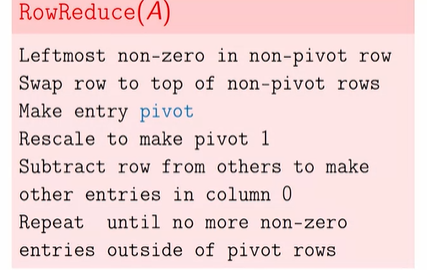

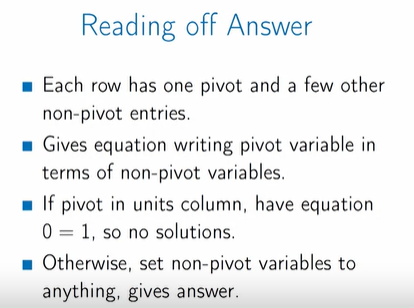

El algoritmo tiene un tiempo de O(nm* min{n,m})

# Basic Tools
Dado un sistema de desigualdades lineales, siempre definen lo que se conoce como un polytopo convexo. <br> <br>
Polytopo: Es una regi'on de R^3 acotadas por superficies planas. Estas superficies se intersectan en ejes y a su vez estos en vertices (en R^3). En R^n se extiende la def. <br> <br>
El espacio de soluciones a un sistema lineal de desigualdades es un polytopo convexo (cada segmento de linea est'a contenido). Es un polytopo porque la solucion de cada desigualdad es un semiplano (o un semiespacio o un semi...) y al aplicarlas todas nos queda un polytopo. Y es convexo porque las soluciones s'olo pueden estar de un lado de un hiperplano. <br> <br> 


Lema: Dado un politopo y una funci'on lineal en el politopo, la funci'on alcanza un maximo o un minimo en los vertices. <br><br>

### Dualidad

Digamos  que queremos maximizar 200M + 100W con las condiciones $\begin{cases} W \geq  0 \\
100 \geq M \geq 0 \\ w \geq 2M \\ 100000 \geq 200(W-2M) + 600M \end{cases}$ <br>
Entonces se puede demostrar que el mejor valor es a lo mucho 60,000. Pues juntando des de las constraints se puede llegar a 200M + 100W <= 60000. Luego, se puede encontrar que hay una esquina en la que el valor es justo este. Y con ello probamos ya el maximo. <br><br>
En general, es una buena estrategia juntar las desigualdades para intentar acotar la funcion que se quiere maximizar
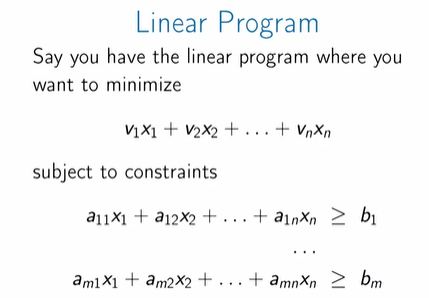

Buscamos combinar las desigualdades para acotar la funcion a maximizar.
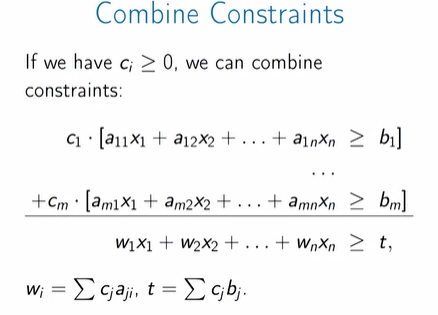

Si de alguna forma consiguieramos que wi = vi para todo i, entonces conseguiriamos acotar la funcion:
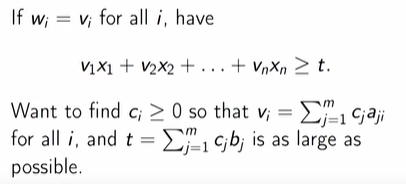
Intentamos encontrar el maximo de t para que la cota inferior sea lo mas grande. <br> <br>


Lo interesante es que esto nos lleva a otro problema lineal.
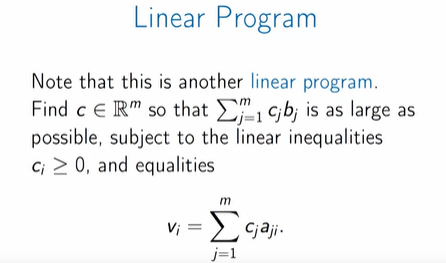

Formalmente:
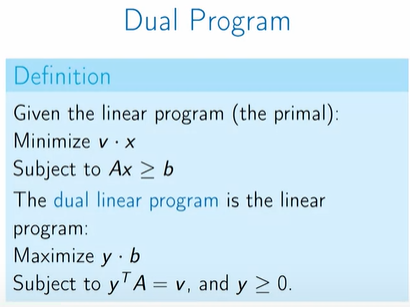

Entonces, unasolucion al problema dual acota al probelma original. <br>
Lo sorprendente es:<br><br>

Teorema: Un problema lineal y su problema dual siempre tienen la misma solucion.  <br> <br>

Corolario: Con esto se puede probar como caso particular el maxflow-mincut para redes <br> <br>

Otro teorema:
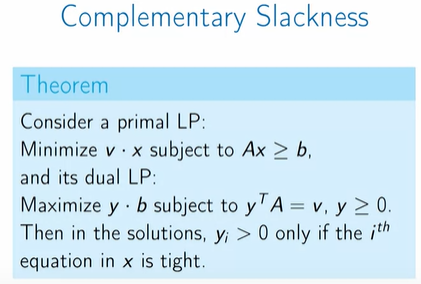
Ddonde LP significa lineal problem. Y tight significa que es una igualdad. 

Ejemplo: aqu'i la respuesta es 2 y 4
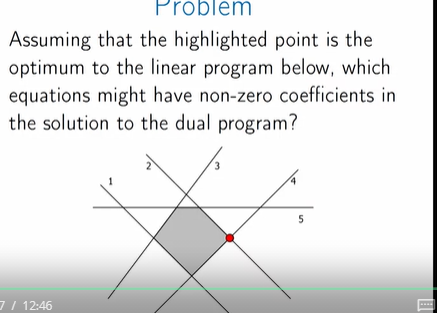

# Algoritmos

Hay muchos tipos de problemas distintos llamados problemas lineales: <br> 
1) Full Optimization: Maximizar o minimizar una funci'on lineal dadas desigaldades lineales. (es lo que hemos hecho) <br> 
2) Optimization from starting point: Dado un sistema de desigualdades lineales y un v'ertice del polytopo que definen, optimizar una funcion lineal. <br> 
3) Solution Finding: Dado un sistema de desigualdades lineales, encontrar una soluci'on. <br> 
4) Solvability: Dado un sistema de desigualdades lineales,  existe una soluci'on? <br><br>

Claramente el problema m'as fuerte es el primero y as'i van bajando. La soluci'on al problema 1 resuelve todos los otros problemas. <br>
Pero lo bueno es que de hecho todos los problemas se resuelven equivalentemente. <br> <br>
2) -> 1): Digamos que sabemos resolver 2 y queremos resolver 1. Dadas las desigualdades lineales de 2, tomamos s'olo 1 de esas desigualdades y encontramos una soluci'on optima a la funci'on lineal. Luego, agregamos otra ecuaci'on al sistema (lo que achica el polytopo) y como sabemos resolver 2) y ya tenemos una soluci'on, podemos mover el starting point para encontrar una soluci'on dada esta nueva condici'on. Y as'i seguimos hasta tneer todas las condiciones. <br> <br> 
3) -> 2) : En vez de encontrar una soluci'on al problema, encontramos una soluci'on al problema y a su dual a la vez. Por 3), vamos a poder encontrar una soluci'on y como satisface el problema y el dual, debe de ser la soluci'on optima
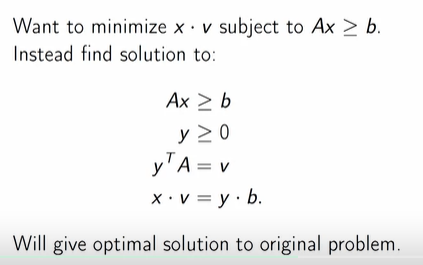
4)->3) Empezamos con un sistema de m desigualdades 

Como puede ser el que sigue:
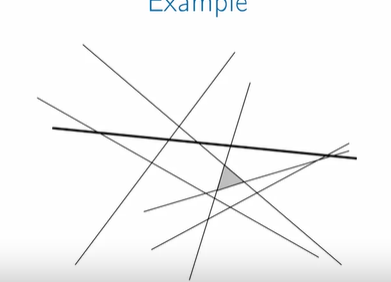
Las lineas indican la igualdad de cada ecuacion y la regi'on es la soluci'on a todas als desigualdades. Buscamos encontrar un punto en la reg'on a partir de puros problemas de solvability. Para ello, escogemos una de las ecuaciones (la linea marcada) y nos preguntamos si esa igualdad (que representa la linea tal cual) junto con las otras m-1 desigualdades tiene soluci'on. Si la respuesta es no, desechamos la linea. <br>
As'i seguimos hasta que la respuesta sea s'i. Cuando sea s'i guardamos dicha linea y dejamos esa ecuaci'on como una igualdad. Luego, si encontramos dos l'ineas, su punto de intersecci'on va a ser un punto de la regi'on gris. <br>
Con lo que hemos encontrado un punto en el conjunto de soluci'on con s'olo resolver problemas de solvability

# Algoritmo Simplex

El algoritmo va a resolver optimizacion desde un starting point (el problema 2). <br>
Empezamos en un vertice de nuestro polytopo y buscamos encontrar los otros vertices para ver d'onde se optimiza la funci'on. 
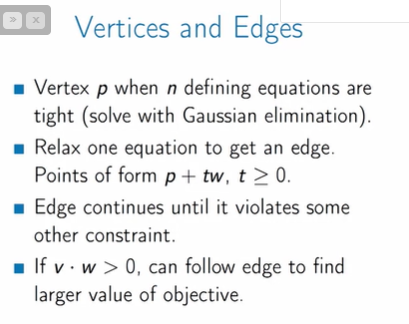

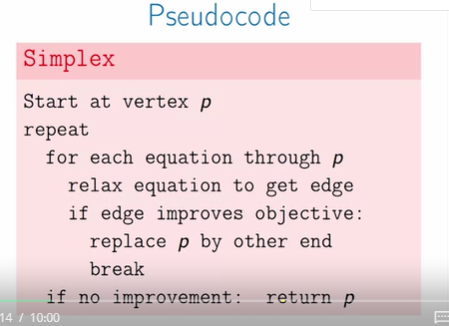
El algoritmo empieza en un vertice y ve qu'e ejes pasan por p. Luego, sigue el camino a lo largo de este eje y ve si la ecuacion a minimizar mejora. Si mejora, sigue este camino hasta llegar al otro vertice y repite. <br>
Cuando ninguno de los ejes que pasan por p mejoran la ecuaci'on, es porque p ya es el punto optimo. 

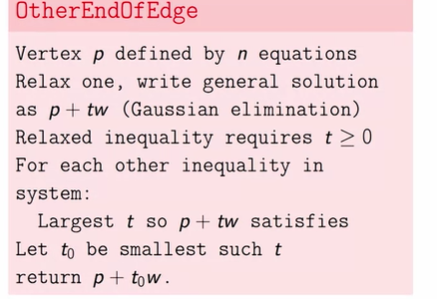

Para demostrar que el algoritmo funciona, hay que probar que <br>
Teorema: Si p es un vertice no optimo, siempre hay un mejor vertice que es adyacente a p. <br> 
El algoritmo puede ser bueno pero a veces tiene un tiempo exponencial. <br><br>

Hay un algoritmo m'as complicado llamado elipsoidal. Este algoritmo corre a tiempo polinomial pero un polinomio de orden como 7. Por ello no siempre es mejor que el simplex.